## Resumen del Tutorial

Clustering se refiere a un conjunto de algoritmos o técnicas no supervisadas que agrupa datos en distintas clases. A diferencia de los algoritmos vistos hasta ahora, los de clustering solo interpretan los datos. Un cluster se refiere a un área de densidad al cual un dato se acerca más que al resto de clusters, cada uno contiene un dato central (centroide) y un límite. Útiles para encontrar patrones dentro de los datos de un conjunto.

Algunos algoritmos utilizan un número de clusters por encontrar y otros la distancia mínima en la cual los datos se consideran cercanos. Hay varios en *scikit-learn*:

#### **I. Affinity Propagation**
Los datos intercambian información hasta que encuentra un conjunto de ejemplares y clusters.
Algunos parámetros para configurar son *damping* y *preference*.

#### **II. Agglomerative Clustering**
Es considerado un método de clustering por jerarquía, realiza mezclas hasta alcanzar un número de clusters, que se puede configurar como parámetro *n_clusters*.

#### **III. BIRCH**
Crea una estructura de árbol de donde se obtienen los centroides de los cluster. Los hiperparámetros configurables son *threshold* y *n_clusters*.

#### **IV. DBSCAN**
Encuentra áreas de gran densidad dentro del dominio de los datos y expande esas áreas en forma de clusters.
Algunos parámetros configurables son *eps* y *min_samples*.

#### **V. K-Means**
De los más conocidos, se encarga de asignar datos a clusters con tal de minimzar la varianza dentro de cada cluster. El número estimado de clusters se puede configurar bajo el parámetro *n_clusters*.

#### **VI. Mini-Batch K-Means**
Se basa en *K-Means*, actualiza los centroides utilizando porciones del dataset. Parámetros configurables: *n_clusters*.

#### **VII. Mean Shift**
Encuentra y adapta los centroides basados en la densidad de los datos del conjunto, *bandwidth* es un paráemtro que se puede configurar.

#### **VIII. OPTICS**
Se basa en el algoritmo de *DBSCAN*. Se puede configurar *eps* y *min_samples*.

#### **IX. Spectral Clustering**
Utiliza conceptos matriciales de álgebra lineal para crear los clusters. Tiene parámetros como *n_clusters*, para estimar el número de clusters en el dataset.

#### **X. Gaussian Mixture Model**
Implica funciones de densidad de probabilidad y distribuciones de probabilidad gaussiana para crear los clusters. Como en otros algoritmos, se puede configurar el *n_clusters*.

## Parte Práctica

Dataset: *wine clustering*.

Consiste en datos de vinos cultivados en Italia, los cuales pertenecen a una de las tres clases de vinos que se encuentran en el dataset.

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('ggplot')

dataset = 'https://raw.githubusercontent.com/rigovil/ci0163/main/pr%C3%A1cticas/pr%C3%A1ctica_7/wine-clustering.csv'
datasetClasificado = 'https://raw.githubusercontent.com/rigovil/ci0163/main/pr%C3%A1cticas/pr%C3%A1ctica_7/wine.csv'
vinos = pd.read_csv(dataset, sep=',')
vinosClasificado = pd.read_csv(datasetClasificado, sep=',')

In [2]:
vinos.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [3]:
vinosClasificado.head(3)

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


Gráfico de distribución de todos los vinos por tipo (3 tipos según color)

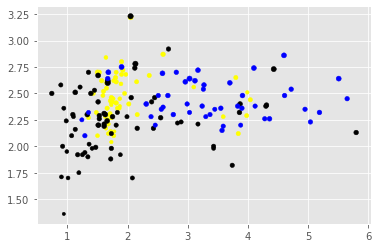

In [26]:
from numpy import where

array = vinosClasificado.values
X = array[:,1:14]
y = array[:,0]

colores = ["yellow", "black", "blue"]

for tipo in range(1,4):
  row_ix = where(y == tipo)
  color = colores[tipo-1]
  pyplot.scatter(X[row_ix, 1], X[row_ix, 2], X[row_ix, 3], c=color)

pyplot.show()

### Clustering con K-Means

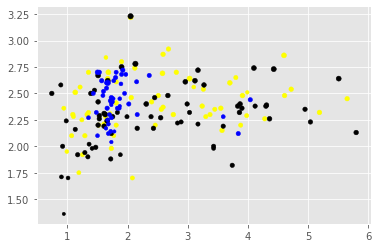

In [37]:
from sklearn.cluster import KMeans
from numpy import unique

model = KMeans(n_clusters=3)
model.fit(X)

yhat = model.predict(X)
clusters = unique(yhat)
numColor = 0

for cluster in clusters:
  color = colores[numColor]
  numColor = numColor+1
  row_ix = where(yhat == cluster)
  pyplot.scatter(X[row_ix, 1], X[row_ix, 2], X[row_ix, 3], c=color)

pyplot.show()

Por naturaleza y como se vio en el primer gráfico, los datos naturalmente no parecen estar agrupados. Este algoritmo logra agrupar algunos correctamente pero los resultados son bastante malos, por más que se le indique por hiperparámetro que los clusters deben ser 3 la agrupación es bastante pobre para como verdaderamente están agrupados.

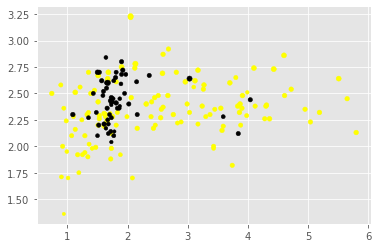

In [58]:
from sklearn.cluster import KMeans
from numpy import unique

model = KMeans(n_clusters=2)
model.fit(X)

yhat = model.predict(X)
clusters = unique(yhat)
numColor = 0

for cluster in clusters:
  color = colores[numColor]
  numColor = numColor+1
  row_ix = where(yhat == cluster)
  pyplot.scatter(X[row_ix, 1], X[row_ix, 2], X[row_ix, 3], c=color)

pyplot.show()

Se cambió el parámetro de *n_clusters* a 2, aunque se sepa que los clusters realmente son 3. Pero, sorprendentemente, el algoritmo no realiza un mal trabajo al agrupar de negro los datos que originalmente se mostraron como amarillos. Esos datos parece haber logrado aislarlos de forma bastante precisa, y el resto, que originalmente son dos clusters separados, se tomaron como uno solo. Este algoritmo parece adecuarse un poco más al dataset pero no lo suficiente y se puede deber a que naturalmente es difícil organizarlos en clusters, pues los datos de una misma clase están muy dispersos.

### Clustering con Affinity Propagation

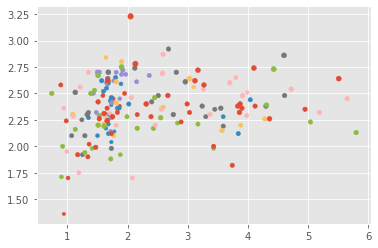

In [52]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.9)
model.fit(X)

yhat = model.predict(X)
clusters = unique(yhat)

for cluster in clusters:
  row_ix = where(yhat == cluster)
  pyplot.scatter(X[row_ix, 1], X[row_ix, 2], X[row_ix, 3])

pyplot.show()

Este algoritmo arroja un resultado bastante peculiar, pues parece haber encontrado más clusters de los que realmente hay, pero los datos de un cluster parecen estar bastante lejos entre sí, lo cual sí ocurre dentro de los cluster originalmente creados.

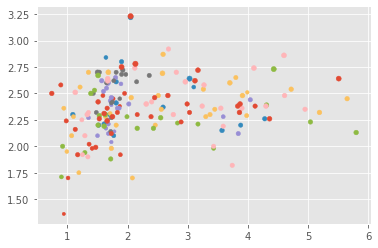

In [57]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.5)
model.fit(X)

yhat = model.predict(X)
clusters = unique(yhat)

for cluster in clusters:
  row_ix = where(yhat == cluster)
  pyplot.scatter(X[row_ix, 1], X[row_ix, 2], X[row_ix, 3])

pyplot.show()

Cambiando el hiperparámtro *damping* de 0.9 a 0.5, los resultados no parece arrojar resultados muy diferentes a lo que ya se obtuvo en el gráfico anterior. Por lo que se puede decir que no es un buen algoritmo de clustering para este dataset.